In [1]:
# Basic Libraries
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
breastcancer = pd.read_csv('breast-cancer-wisconsin.data')

In [3]:
breastcancer.columns = [
    "Sample code number",
    "Clump Thickness",
    "Uniformity of Cell Size",
    "Uniformity of Cell Shape",
    "Marginal Adhesion",
    "Single Epithelial Cell Size",
    "Bare Nuclei",
    "Bland Chromatin",
    "Normal Nucleoli",
    "Mitoses",
    "Class"
]

In [4]:
breastcancer = breastcancer.replace('?', np.nan)

In [5]:
# Remove missing data
breastcancer.dropna(axis='index', inplace = True)

In [6]:
breastcancer.drop("Sample code number", axis=1, inplace=True)
breastcancer.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [7]:
breastcancer = breastcancer.astype({"Bare Nuclei":'int64'})

In [8]:
clump = pd.DataFrame(breastcancer['Clump Thickness'])
cell_size = pd.DataFrame(breastcancer['Uniformity of Cell Size'])
cell_shape = pd.DataFrame(breastcancer['Uniformity of Cell Shape'])
marginal_adhesion = pd.DataFrame(breastcancer['Marginal Adhesion'])
epithelial = pd.DataFrame(breastcancer['Single Epithelial Cell Size'])
nuclei = pd.DataFrame(breastcancer['Bare Nuclei'])
chromatin = pd.DataFrame(breastcancer['Bland Chromatin'])
nucleoli = pd.DataFrame(breastcancer['Normal Nucleoli'])
mitoses = pd.DataFrame(breastcancer['Mitoses'])
class_ = pd.DataFrame(breastcancer['Class'])

In [9]:
#breastcancer.to_csv('DAM_BreastCancer.csv', index=False)

In [10]:
nuclei.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 697
Data columns (total 1 columns):
Bare Nuclei    682 non-null int64
dtypes: int64(1)
memory usage: 10.7 KB


In [11]:
breastcancer = breastcancer.astype({"Clump Thickness":'category', "Uniformity of Cell Size": 'category', "Uniformity of Cell Shape": 'category', "Marginal Adhesion": 'category', "Single Epithelial Cell Size": 'category', "Bare Nuclei": 'category', "Bland Chromatin": 'category', "Normal Nucleoli": 'category', "Mitoses": 'category', "Class": 'category'})

In [12]:
breastcancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 697
Data columns (total 10 columns):
Clump Thickness                682 non-null category
Uniformity of Cell Size        682 non-null category
Uniformity of Cell Shape       682 non-null category
Marginal Adhesion              682 non-null category
Single Epithelial Cell Size    682 non-null category
Bare Nuclei                    682 non-null category
Bland Chromatin                682 non-null category
Normal Nucleoli                682 non-null category
Mitoses                        682 non-null category
Class                          682 non-null category
dtypes: category(10)
memory usage: 15.6 KB


# Uni Variate Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Function to calculate decision tree accuracies for individual factors
def acc_score (X):
    # Split the Dataset into Train and Test
    x_train, x_test, y_train, y_test = train_test_split(X, class_, test_size = 0.25)
    # Decision Tree using Train Data
    dectree = DecisionTreeClassifier(max_depth = None)  # Create the decision tree object
    dectree.fit(x_train, y_train)  
    return dectree.score(x_test, y_test)

In [14]:
score = [acc_score(clump), acc_score(cell_size), acc_score(cell_shape), acc_score(marginal_adhesion),
         acc_score(epithelial), acc_score(nuclei), acc_score(chromatin), acc_score(nucleoli), acc_score(mitoses)]        
score_factors = pd.DataFrame(score, columns = ['Accuracy Score'], 
                      index = ['clump', 'cell_size', 'cell_shape', 'marginal_adhesion','epithelial',
                               'nuclei', 'chromatin', 'nucleoli', 'mitoses'])
score_factors.sort_values(by = 'Accuracy Score')

,Accuracy Score
mitoses,0.771930
clump,0.842105
marginal_adhesion,0.865497
nucleoli,0.877193
epithelial,0.900585
chromatin,0.906433
cell_size,0.929825
nuclei,0.929825
cell_shape,0.935673


# Multivariate Decision Tree

In [15]:
# Concat all the individual factors
factors2 = pd.concat([clump, cell_size, cell_shape, marginal_adhesion,epithelial,
                    nuclei, chromatin, nucleoli, mitoses], sort = False, axis = 1)
factors2.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,4,4,5,7,10,3,2,1
1,3,1,1,1,2,2,3,1,1
2,6,8,8,1,3,4,3,7,1
3,4,1,1,3,2,1,3,1,1
4,8,10,10,8,7,10,9,7,1


In [16]:
y = class_
X = pd.DataFrame(factors2)

In [17]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (511, 1) (511, 9)
Test Set  : (171, 1) (171, 9)


In [18]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # Create the decision tree object
# Fit Decision Tree on Train Data 
dectree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 0.9894736842105263

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.9537037037037037



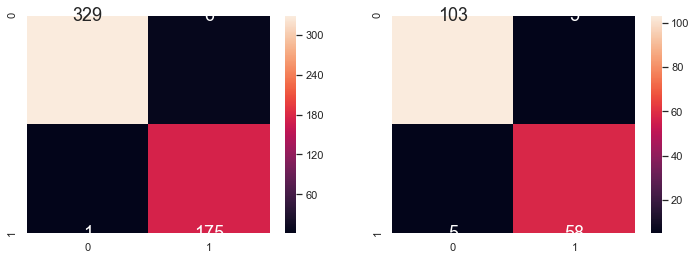

In [19]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred, pos_label = 2))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred, pos_label = 2))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Random Forest

In [20]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 bootstrap = True,
                                max_features = 'sqrt') 

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.9680365296803655



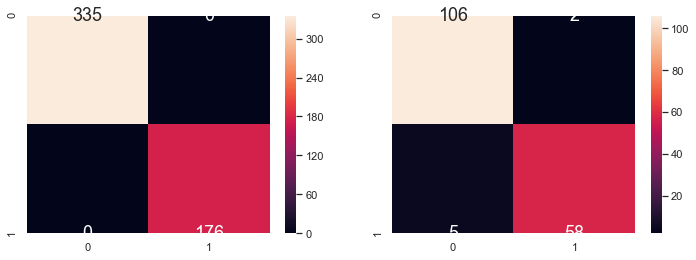

In [21]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred, pos_label = 2))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred, pos_label = 2))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Logistic Regression

In [22]:
# Import Logistic Regression model from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
LR = LogisticRegression()
# Fit Logistic Regression on Train Data 
LR.fit(X_train,y_train.values.ravel())

C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.977645305514158

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.963302752293578



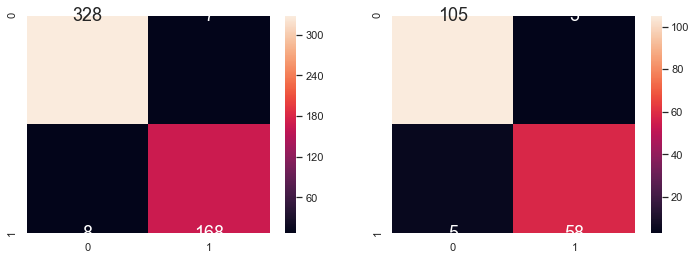

In [23]:
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", f1_score(y_train, y_train_pred, pos_label = 2))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", f1_score(y_test, y_test_pred, pos_label = 2))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0]) 

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# K-Nearest Neighbours

In [24]:
# Import KNN model from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
KNN = KNeighborsClassifier(n_neighbors=22) # k = squareroot N, where N is the number of training data (sqrt(0.75x682))
KNN.fit(X_train,y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=22, p=2,
                     weights='uniform')

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.973293768545994

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9636363636363636



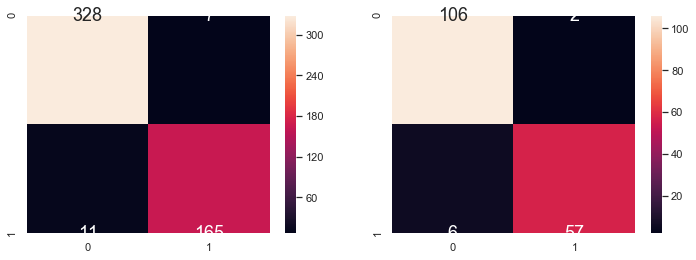

In [25]:
y_train_pred = KNN.predict(X_train)
y_test_pred = KNN.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", f1_score(y_train, y_train_pred, pos_label = 2))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", f1_score(y_test, y_test_pred, pos_label = 2))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Gradient Boosting 

In [26]:
# Import GradientBoostingClassifier model from Scikit-Learn
from sklearn.ensemble import GradientBoostingClassifier

gradboost = GradientBoostingClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                      max_depth = 2,        # Set the maximum depth of each tree
                                      learning_rate = 0.1)  # Learning_rate shrinks the contribution of each tree   

# Fit Gradient Boosting model on Train Data
gradboost.fit(X_train, y_train.values.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 0.9955022488755623

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.9677419354838711



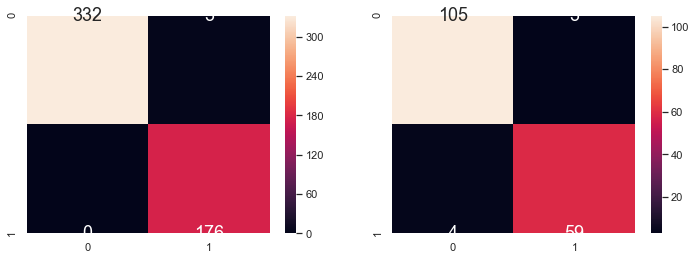

In [27]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = gradboost.predict(X_train)
y_test_pred = gradboost.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred, pos_label = 2))
print()


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred, pos_label = 2))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# XG Boost

In [28]:
# Import XGBClassifier model from Scikit-Learn
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 100,     # n_estimators denote number of trees
                    max_depth = 2,          # Set the maximum depth of each tree
                    gamma=0,                # Regularization parameter: min loss reduction required to make a further partition on a leaf node of the tree
                    learning_rate = 0.1,  # Learning_rate shrinks the contribution of each tree   
                    colsample_bytree = 0.3) # Subsample ratio by number of columns when constructing each tree

# Fit XGBoost on Train Data 
xgb.fit(X_train, y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 0.9834586466165414

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.9724770642201834



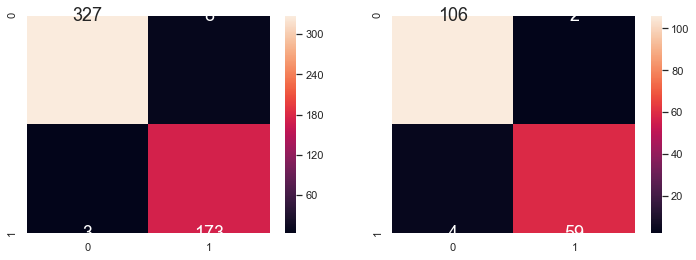

In [30]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred,pos_label = 2))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred,pos_label = 2))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Support Vector Machine

In [31]:
from sklearn import svm
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set

In [32]:
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

In [33]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Sigmoid Kernel:", accuracy_sig)

Accuracy Linear Kernel: 0.9649122807017544
Accuracy Polynomial Kernel: 0.9181286549707602
Accuracy Radial Basis Kernel: 0.8947368421052632
Accuracy Sigmoid Kernel: 0.3157894736842105


# Neural Network

C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9707602339181286


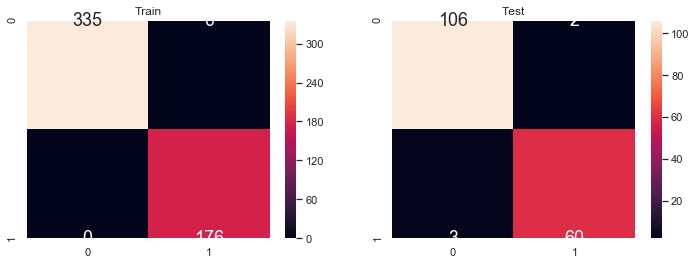

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Fit only to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# MLP neural network
mlp = MLPClassifier(hidden_layer_sizes=(12,12,12),max_iter=600)
mlp.fit(X_train,y_train)

y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Train')
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Test')


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", mlp.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", mlp.score(X_test, y_test))